In [1]:
#imports

import SimDAT2D.SimDAT2D as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D as iso # import IsoDat2D as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data

def make_masks(array, slices, offset = 5, width=.5, gits = False):
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Ni


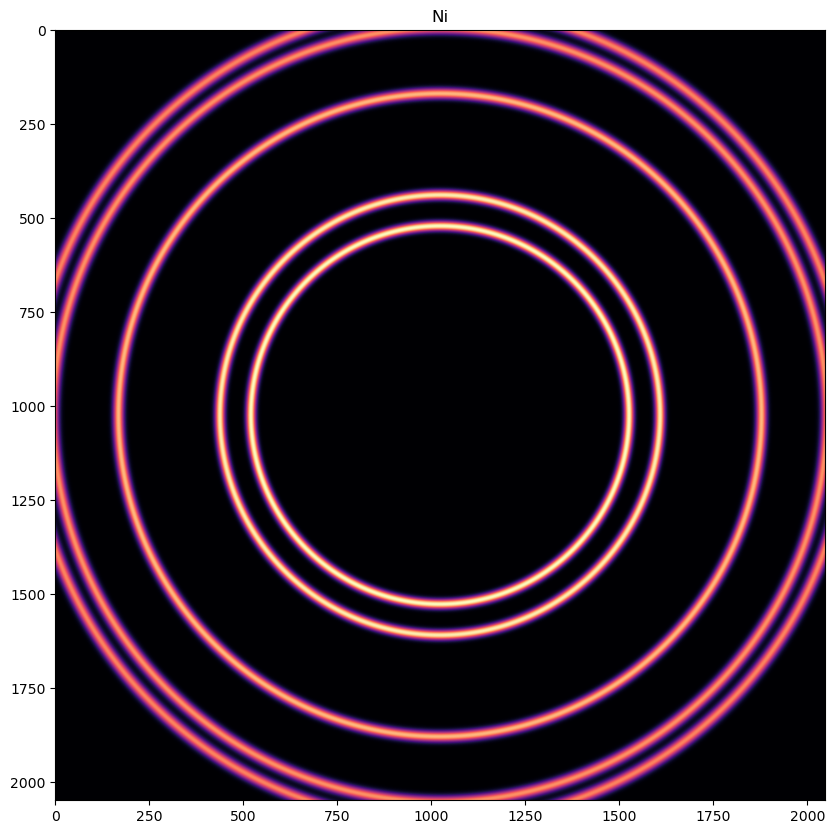

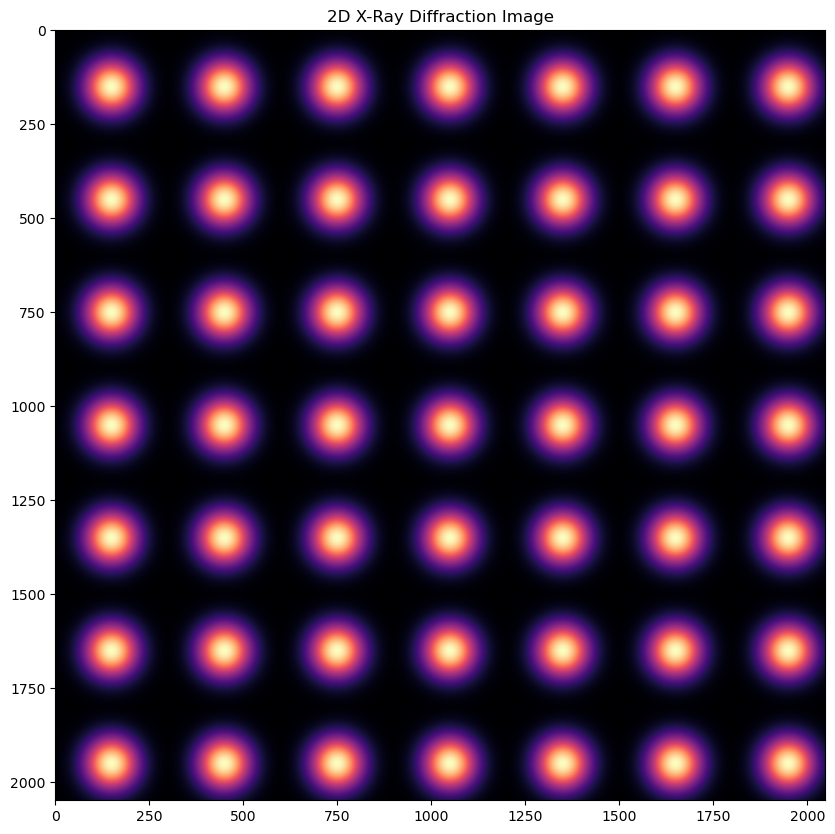

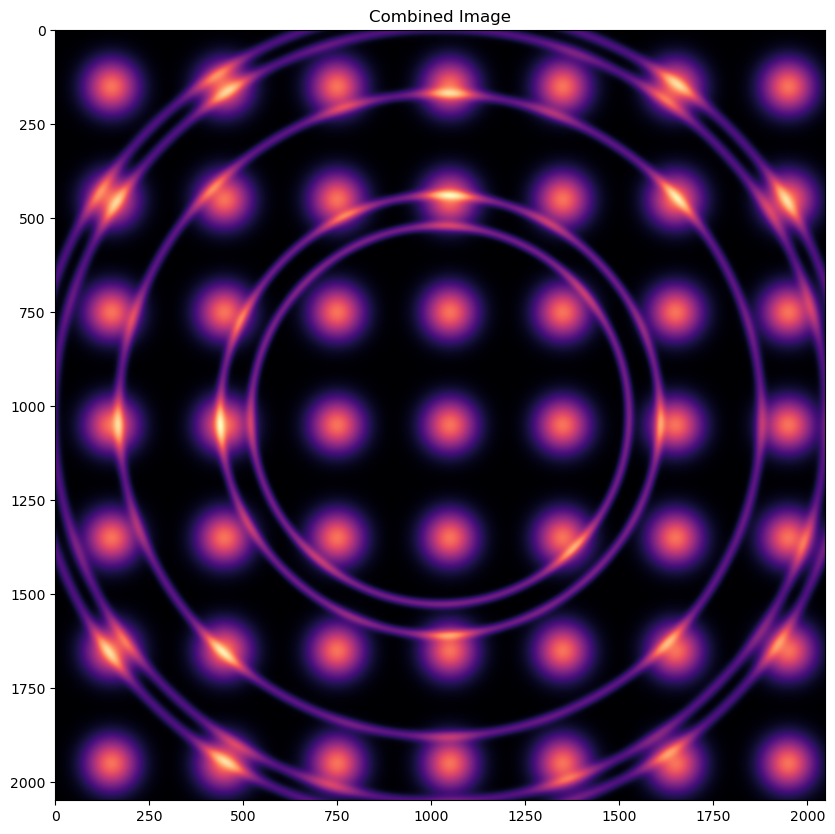

In [4]:
#creating synthetic data

#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

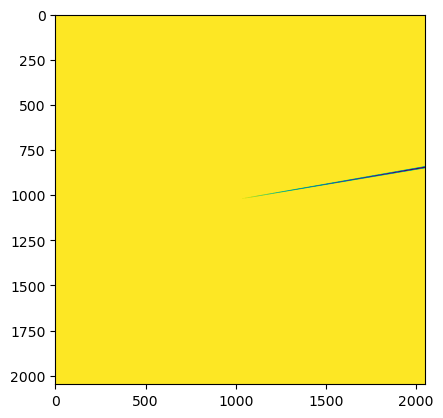

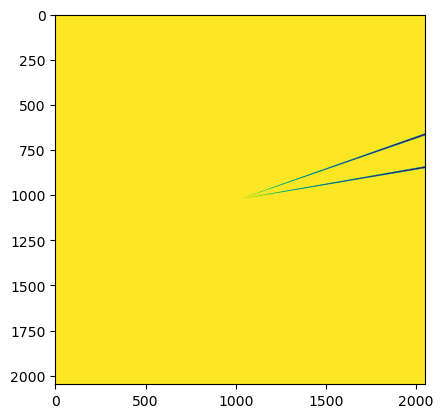

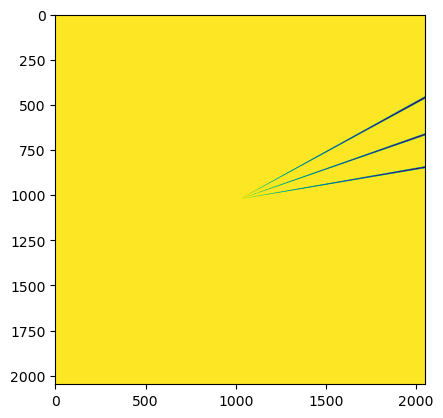

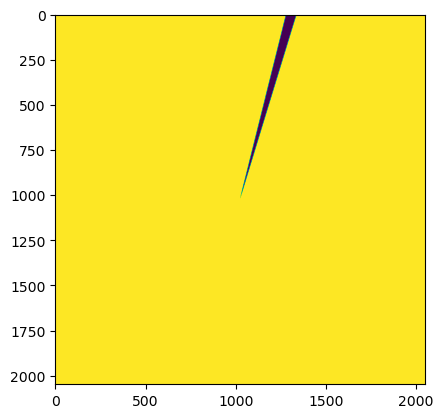

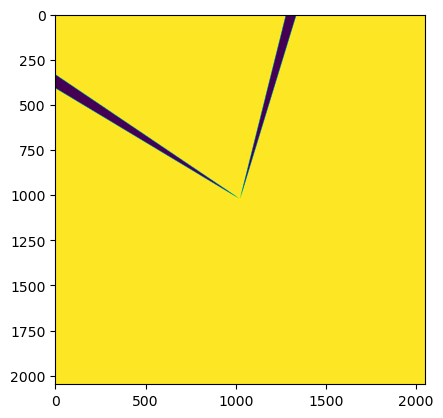

In [5]:
array, ai_pe = masking.make_chi_array(thin_film, .4, .5e-10)
masks = make_masks(array, [1,2,3], offset = 9, width = .5, gits = True)
masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
mask_four = masks_v2[0] 
mask_five = masks_v2[1]

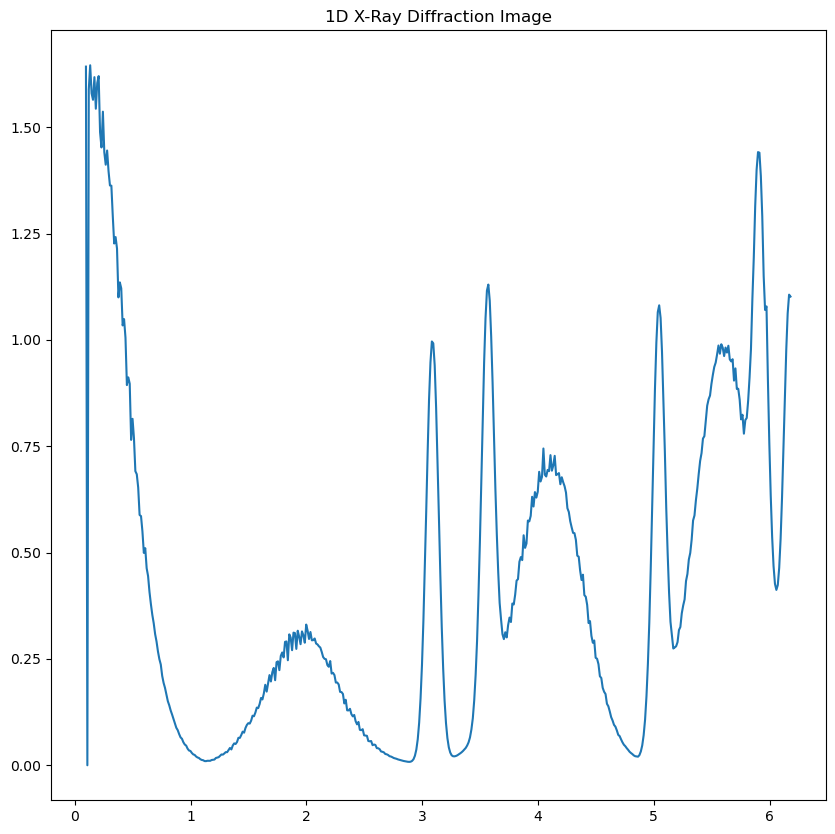

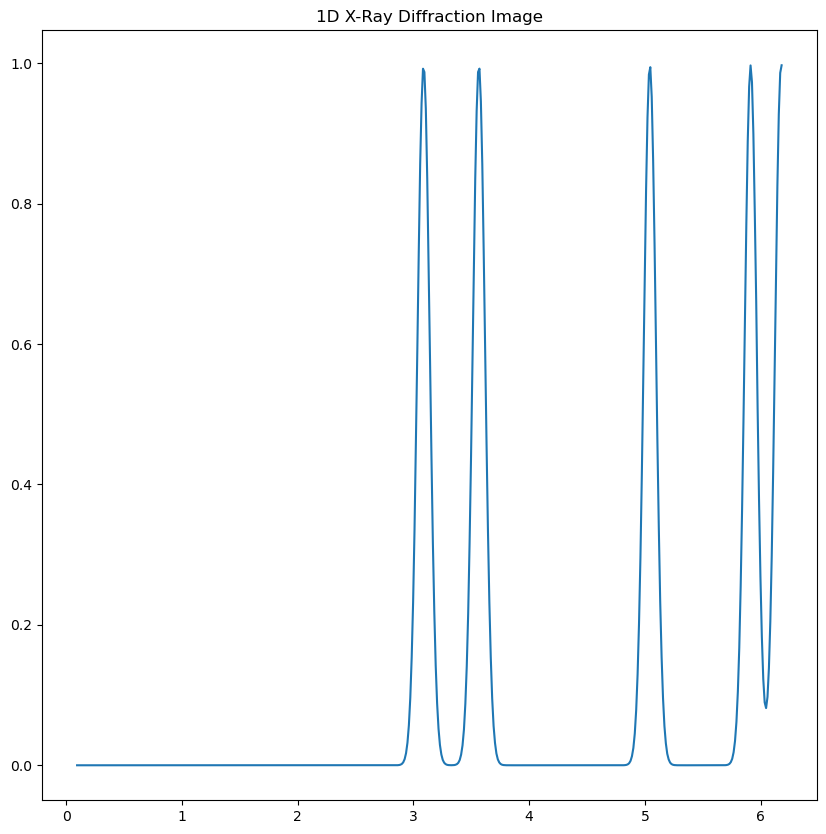

In [6]:
q, integrated_im = sim.integrate_image(thin_film, .4, .5e-10, resolution = 500, mask = mask_two, show = True)
q, integrated_im2 = sim.integrate_image(isotropic_signal, .4, .5e-10, resolution = 500, mask = mask_two, show = True)   

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


image_rotation executed in 0.0081 seconds
image_rotation executed in 0.0061 seconds
image_rotation executed in 0.0064 seconds
image_rotation executed in 0.0071 seconds
image_rotation executed in 0.0072 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0081 seconds
image_rotation executed in 0.0083 seconds
image_rotation executed in 0.0088 seconds
image_rotation executed in 0.0090 seconds
image_rotation executed in 0.0097 

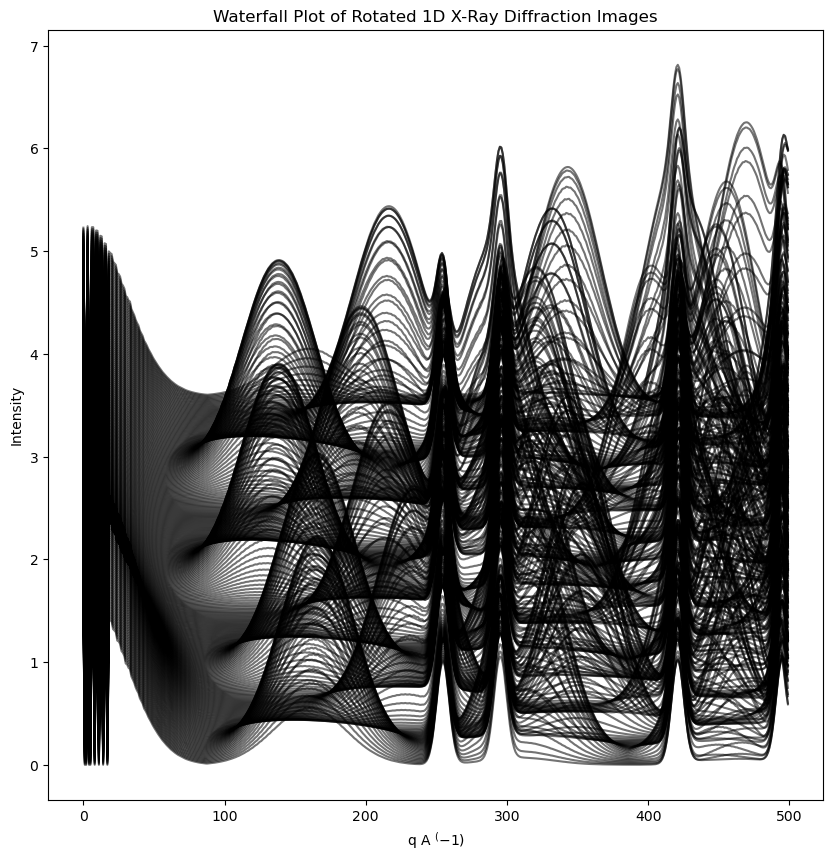

rotate_integrate_image_gpu executed in 7.8933 seconds
image_rotation executed in 0.0058 seconds
image_rotation executed in 0.0061 seconds
image_rotation executed in 0.0065 seconds
image_rotation executed in 0.0068 seconds
image_rotation executed in 0.0071 seconds
image_rotation executed in 0.0074 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0082 seconds
image_rotation executed in 0.0086 seconds
image_rotation execute

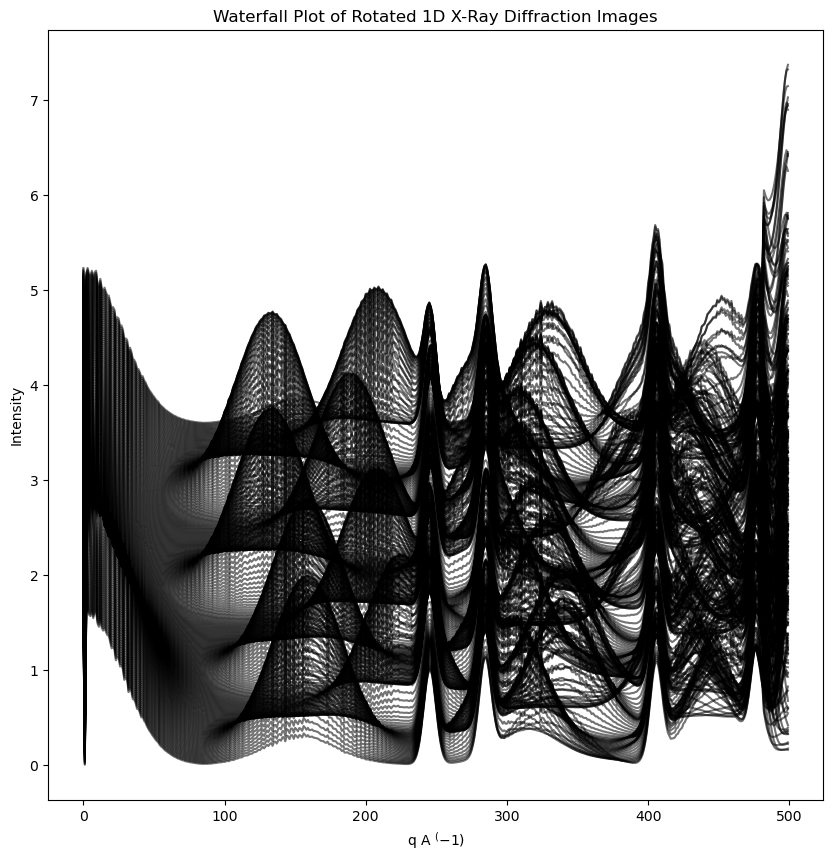

rotate_integrate_image_gpu executed in 7.6486 seconds
image_rotation executed in 0.0057 seconds
image_rotation executed in 0.0062 seconds
image_rotation executed in 0.0068 seconds
image_rotation executed in 0.0070 seconds
image_rotation executed in 0.0074 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0082 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0083 seconds
image_rotation executed in 0.0088 seconds
image_rotation execute

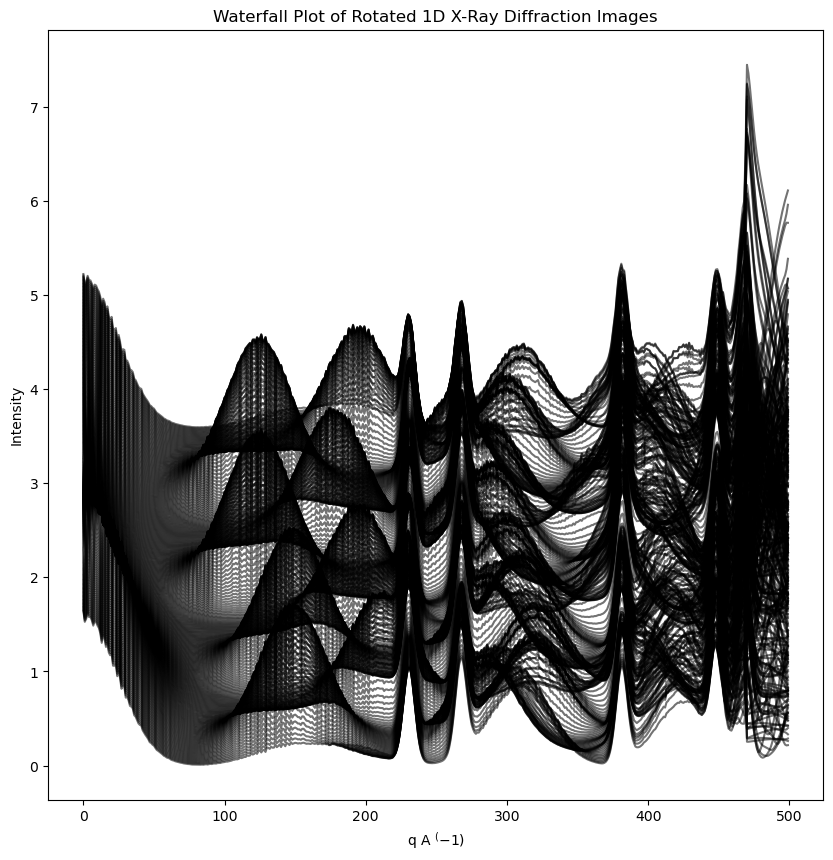

rotate_integrate_image_gpu executed in 7.5462 seconds
image_rotation executed in 0.0058 seconds
image_rotation executed in 0.0061 seconds
image_rotation executed in 0.0067 seconds
image_rotation executed in 0.0068 seconds
image_rotation executed in 0.0074 seconds
image_rotation executed in 0.0072 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0080 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0081 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0081 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0084 seconds
image_rotation executed in 0.0084 seconds
image_rotation execute

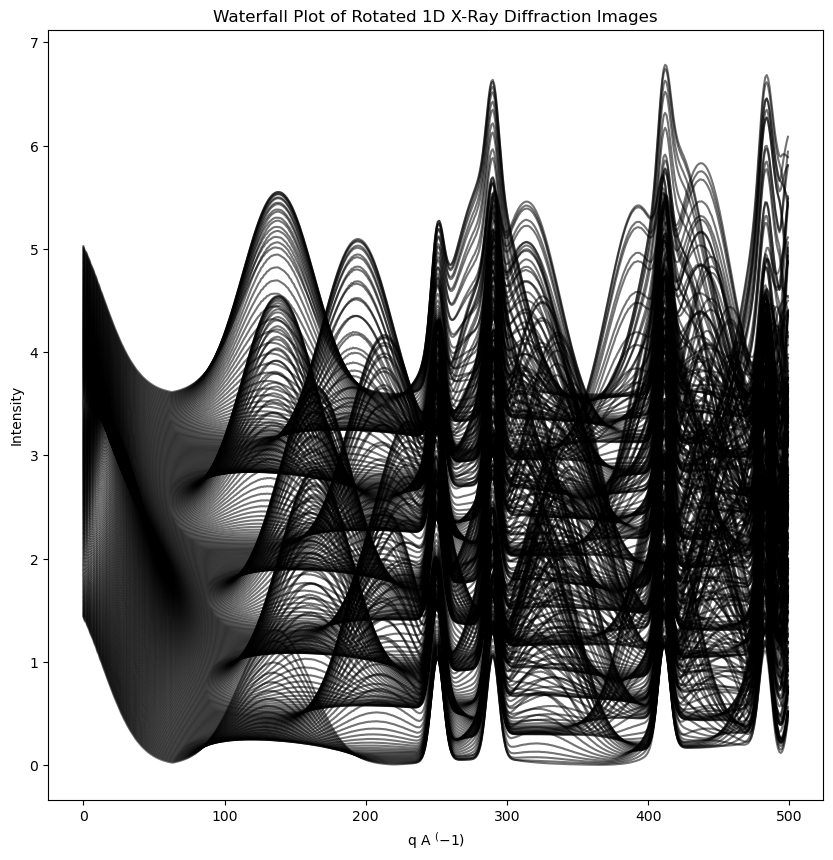

rotate_integrate_image_gpu executed in 7.4921 seconds
image_rotation executed in 0.0057 seconds
image_rotation executed in 0.0062 seconds
image_rotation executed in 0.0065 seconds
image_rotation executed in 0.0068 seconds
image_rotation executed in 0.0073 seconds
image_rotation executed in 0.0072 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0076 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0075 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0077 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0078 seconds
image_rotation executed in 0.0079 seconds
image_rotation executed in 0.0082 seconds
image_rotation executed in 0.0086 seconds
image_rotation execute

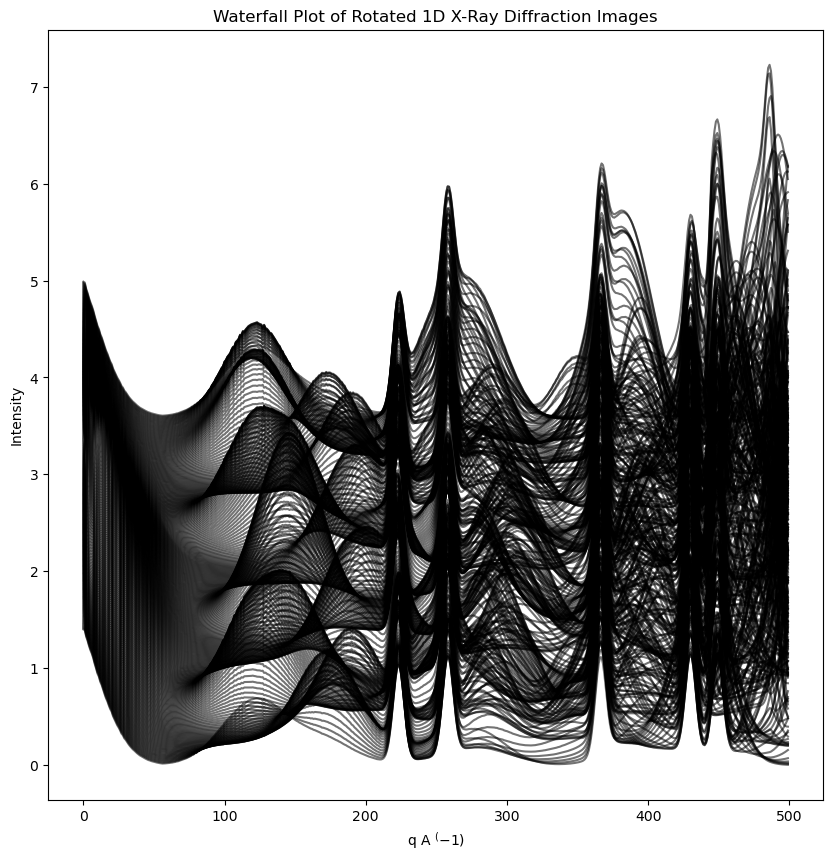

rotate_integrate_image_gpu executed in 7.6481 seconds


In [7]:
rotated_data = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_one);
rotated_data_v2 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_two);
rotated_data_v3 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_three);
rotated_data_v4 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_four);
rotated_data_v5 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_five);

In [8]:
column_mapping = {}
for i in range(361, 721):
    column_mapping[(i - 361)] = (i)
rotated_data_v2.rename(columns=column_mapping, inplace=True) 
   
column_mapping = {}
for i in range(722, 1082):
    column_mapping[(i - 722)] = (i)
print(column_mapping)
rotated_data_v3.rename(columns=column_mapping, inplace=True) 

column_mapping = {}
for i in range(1083, 1443):
    column_mapping[(i - 1083)] = (i)
print(column_mapping)
rotated_data_v4.rename(columns=column_mapping, inplace=True)  
  
column_mapping = {}
for i in range(1444, 1804):
    column_mapping[(i - 1444)] = (i)
rotated_data_v5.rename(columns=column_mapping, inplace=True)

{0: 722, 1: 723, 2: 724, 3: 725, 4: 726, 5: 727, 6: 728, 7: 729, 8: 730, 9: 731, 10: 732, 11: 733, 12: 734, 13: 735, 14: 736, 15: 737, 16: 738, 17: 739, 18: 740, 19: 741, 20: 742, 21: 743, 22: 744, 23: 745, 24: 746, 25: 747, 26: 748, 27: 749, 28: 750, 29: 751, 30: 752, 31: 753, 32: 754, 33: 755, 34: 756, 35: 757, 36: 758, 37: 759, 38: 760, 39: 761, 40: 762, 41: 763, 42: 764, 43: 765, 44: 766, 45: 767, 46: 768, 47: 769, 48: 770, 49: 771, 50: 772, 51: 773, 52: 774, 53: 775, 54: 776, 55: 777, 56: 778, 57: 779, 58: 780, 59: 781, 60: 782, 61: 783, 62: 784, 63: 785, 64: 786, 65: 787, 66: 788, 67: 789, 68: 790, 69: 791, 70: 792, 71: 793, 72: 794, 73: 795, 74: 796, 75: 797, 76: 798, 77: 799, 78: 800, 79: 801, 80: 802, 81: 803, 82: 804, 83: 805, 84: 806, 85: 807, 86: 808, 87: 809, 88: 810, 89: 811, 90: 812, 91: 813, 92: 814, 93: 815, 94: 816, 95: 817, 96: 818, 97: 819, 98: 820, 99: 821, 100: 822, 101: 823, 102: 824, 103: 825, 104: 826, 105: 827, 106: 828, 107: 829, 108: 830, 109: 831, 110: 832,

In [9]:
combined_data = pd.concat([rotated_data, rotated_data_v2, rotated_data_v3, rotated_data_v4, rotated_data_v5], axis = 1)
combined_data = combined_data.clip(lower=0)
combined_data = np.array(combined_data) 

 ...]

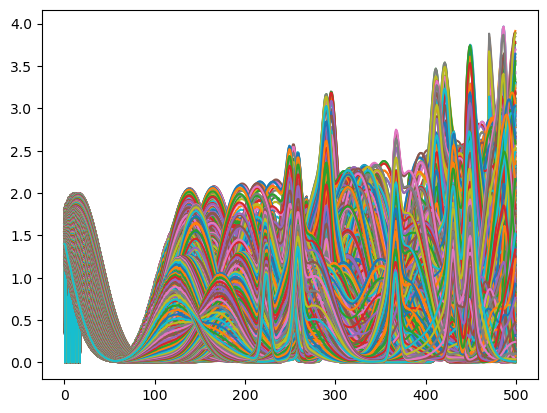

In [10]:
plt.plot(combined_data)

In [10]:
import nimfa
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

def run_nimfa_nmf(data, max_components, max_iter=600, update='divergence', objective='div', n_run=30, track_error=True, tolerance=1e-4, patience=5):
    """
    Run NMF using the nimfa library with flexible parameters and iterate over the number of components until error stabilizes.

    Parameters:
    - data: Input data matrix.
    - max_components: Maximum number of components to try.
    - max_iter: Maximum number of iterations (default: 600).
    - update: Update rule (default: 'divergence').
    - objective: Objective function (default: 'div').
    - n_run: Number of runs (default: 30).
    - track_error: Whether to track error (default: True).
    - tolerance: Tolerance for error change to consider it stabilized (default: 1e-4).
    - patience: Number of runs to wait for error stabilization (default: 5).

    Returns:
    - best_W: Best basis matrix.
    - best_H: Best coefficient matrix.
    - best_er: Best error tracking.
    - best_n_components: Number of components for the best result.
    """
    best_W, best_H, best_er = None, None, None
    best_n_components = 0
    previous_errors = []

    for n_components in range(1, max_components + 1):
        nmf = nimfa.Nmf(data, rank=n_components, max_iter=max_iter, update=update, objective=objective, n_run=n_run, track_error=track_error)
        nmf_fit = nmf()
        W = nmf_fit.basis()
        H = nmf_fit.coef()
        er = nmf_fit.fit.tracker.get_error()

        logging.info('Components: %d, Euclidean distance: %5.3f', n_components, nmf_fit.distance(metric='euclidean'))
        logging.info('Error tracking:\n%s', nmf_fit.fit.tracker.get_error())

        sm = nmf_fit.summary()
        logging.info('Sparseness Basis: %5.3f  Mixture: %5.3f', sm['sparseness'][0], sm['sparseness'][1])
        logging.info('Iterations: %d', sm['n_iter'])

        if len(previous_errors) >= patience:
            if all(abs(previous_errors[-i] - er[-1]) < tolerance for i in range(1, patience + 1)):
                logging.info('Error has stabilized over the last %d runs.', patience)
                best_W, best_H, best_er = W, H, er
                best_n_components = n_components
                break

        previous_errors.append(er[-1])
        best_W, best_H, best_er = W, H, er
        best_n_components = n_components

    return best_W, best_H, best_er, best_n_components


In [ ]:
best_W, best_H, best_er, best_n_components = run_nimfa_nmf(combined_data, max_components=10, max_iter=1000, update='euclidean', objective='fro', n_run=5)

In [85]:
import numpy as np
from sklearn.decomposition import NMF
import logging
import warnings

# Configure logging
logging.basicConfig(level=logging.INFO)

def run_sklearn_nmf(data, max_components, max_iter=600, init='random', solver='cd', tol=1e-4, patience=5):
    """
    Run NMF using the sklearn library with flexible parameters and iterate over the number of components until error stabilizes.

    Parameters:
    - data: Input data matrix.
    - max_components: Maximum number of components to try.
    - max_iter: Maximum number of iterations (default: 600).
    - init: Initialization method (default: 'random').
    - solver: Solver to use (default: 'cd').
    - tol: Tolerance for error change to consider it stabilized (default: 1e-4).
    - patience: Number of runs to wait for error stabilization (default: 5).

    Returns:
    - best_W: Best basis matrix.
    - best_H: Best coefficient matrix.
    - best_reconstruction_err: Best reconstruction error.
    - best_n_components: Number of components for the best result.
    """
    
    warnings.filterwarnings("ignore")
    
    best_W, best_H = None, None
    best_reconstruction_err = float('inf')
    best_n_components = 0
    previous_errors = []

    for n_components in range(1, max_components + 1):
        model = NMF(n_components=n_components, max_iter=max_iter, init=init, solver=solver, tol=tol)
        W = model.fit_transform(data)
        H = model.components_
        reconstruction_err = model.reconstruction_err_

        logging.info('Components: %d, Reconstruction error: %5.3f', n_components, reconstruction_err)
        
        print('Run with {} components has been completed'.format(n_components))

        if len(previous_errors) >= patience:
            if all(abs(previous_errors[-i] - reconstruction_err) < tol for i in range(1, patience + 1)):
                logging.info('Error has stabilized over the last %d runs.', patience)
                print('Error has stabilized over the last {} runs.'.format(patience))
                best_W, best_H = W, H
                best_reconstruction_err = reconstruction_err
                best_n_components = n_components
                break

        previous_errors.append(reconstruction_err)
        best_W, best_H = W, H
        best_reconstruction_err = reconstruction_err
        best_n_components = n_components
        
        
    #create an elbow plot of the error values from all the runs

    plt.figure(figsize=(12, 6))
    plt.plot(previous_errors, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
    plt.title('Elbow Plot of NMF Reconstruction Error')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.grid(True)
    plt.show()
        
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(best_W[0])))

    for i in range(len(best_W[0])):
        plt.plot(best_W[:, i] + i * 0.1, label='Component {}'.format(i + 1), color=colors[i])

    plt.title('Waterfall Plot of NMF Components')
    plt.xlabel('Data Points')
    plt.ylabel('Components')
    plt.grid(True)
    plt.show()
    
    print('The best number of components is {}'.format(best_n_components))

    return best_W, best_H, best_reconstruction_err, previous_errors

In [ ]:
best_W, best_H, best_reconstruction_err, best_n_components = run_sklearn_nmf(combined_data, max_components=25, max_iter=1000, init='nndsvd', solver='mu', tol=1e-4, patience=2)

In [ ]:
# plot the results but in a waterfall and using the format 'best_W[:, i] for i in range(len(best_W))'

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(best_W[0])))

for i in range(len(best_W[0])):
    plt.plot(best_W[:, i] + i * 0.1, label='Component {}'.format(i + 1), color=colors[i])

plt.title('Waterfall Plot of NMF Components')
plt.xlabel('Data Points')
plt.ylabel('Components')
plt.grid(True)
plt.show()

In [ ]:
plt.plot(best_W[:,12])

In [ ]:
plt.plot(best_W[:,0])

In [ ]:
data_dict, iso_signal = iso.run_nmf_and_agg_cluster(np.array(combined_data), 359, 15)

In [ ]:
def run_nmfac(Data, initialize_iter = 0, clusters = 5):
    """A function that will run the NMF algorithm and then cluster with agglomerative clustering the components and returns the 
        identified components for later PDF analysis. The function starts with a random initializer
        that will be used to initialize the NMF algorithm. The user can decide how many iterations the 
        initializer takes. Then it will go through the NMF algorithm and compare the beta divergences of all the
        initializations and select the one with the lowest. By default, there is no initializer and the NMF algorithm
        uses preset parameters to run the algorithm. """
        
        #NMF Parameter Values
        
    import warnings
    warnings.filterwarnings("ignore")
    
    
    init_params = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
    solver_params = ['cd', 'mu']
    beta_loss_params = ['frobenius', 'kullback-leibler']
    tol_params = np.arange(0.00001, 0.01, 0.0001)
    max_iter_params = np.arange(100, 10000, 100)
    shuffle_params = [True, False]
        
    #When random initializers are not wanted
    if initialize_iter == 0:
        weights, components, beta = Run_NMF(Data, show = True)
        AggComponents = np.array(components).T
        AggClusters, found_compos = AggCluster(clusters, AggComponents)
        
        found_compos = np.array(found_compos)
        
    elif initialize_iter > 0:
        beta_div = []
        
        init_for_init = np.random.choice(init_params,initialize_iter)
        solver_for_init = np.random.choice(solver_params, initialize_iter)
        beta_loss_for_init = np.random.choice(beta_loss_params, initialize_iter)
        tol_for_init = np.random.choice(tol_params, initialize_iter)
        max_iter_for_init = np.random.choice(max_iter_params, initialize_iter)
        shuffle_for_init = np.random.choice(shuffle_params, initialize_iter)
        
        for i in range(initialize_iter):
            
            if beta_loss_for_init[i] == 'kullback-leibler':
                solver_for_init[i] = 'mu'
                
            print('The parameters selected for run' + str([i]) + ' are ' + str(init_for_init[i]) + ', ' + str(solver_for_init[i]) + ', ' + str(beta_loss_for_init[i]) + ', ' + str(tol_for_init[i]) + ', ' + str(max_iter_for_init[i]) + ', ' + str(shuffle_for_init[i]) + '. \n' )
            weights, components, beta = Run_NMF(Data, init = init_for_init[i], solver = solver_for_init[i], 
                                                beta_loss = beta_loss_for_init[i], itear = max_iter_for_init[i], show = False)
            
            beta_div.append(beta)
        beta_np = np.array(beta_div)
        good_init = np.argmin(beta_np)
        
        weights, components, beta = Run_NMF(Data, show = True, init = init_for_init[good_init], solver = solver_for_init[good_init], beta_loss=beta_loss_for_init[good_init],
                                             itear = max_iter_for_init[good_init])
        
        AggComponents = np.array(components).T
        AggClusters, found_compos = AggCluster(clusters, AggComponents)
        
        found_compos = np.array(found_compos)
            
        
    return found_compos

In [16]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering

def run_nmfac(Data, initialize_iter=0, clusters=5):
    """A function that will run the NMF algorithm and then cluster with agglomerative clustering the components and returns the 
    identified components for later PDF analysis. The function starts with a random initializer
    that will be used to initialize the NMF algorithm. The user can decide how many iterations the 
    initializer takes. Then it will go through the NMF algorithm and compare the beta divergences of all the
    initializations and select the one with the lowest. By default, there is no initializer and the NMF algorithm
    uses preset parameters to run the algorithm. """
    
    # NMF Parameter Values
    init_params = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
    solver_params = ['cd', 'mu']
    beta_loss_params = ['frobenius', 'kullback-leibler']
    tol_params = np.arange(0.00001, 0.01, 0.0001)
    max_iter_params = np.arange(100, 10000, 100)
    shuffle_params = [True, False]
    
    def Run_NMF(Data, init='random', solver='cd', beta_loss='frobenius', max_iter=200, tol=1e-4, show=False):
        model = NMF(n_components=clusters, init=init, solver=solver, beta_loss=beta_loss, max_iter=max_iter, tol=tol)
        W = model.fit_transform(Data)
        H = model.components_
        reconstruction_err = model.reconstruction_err_
        if show:
            print(f"Reconstruction error: {reconstruction_err}")
        
        plt.figure(figsize=(10, 5))  
        plt.plot(W)
        plt.show()
        
        return W, H, reconstruction_err
    
    def AggCluster(Number_Clusters, data):
        
        """A program that will take in the type of scikitlearn clustering algorithm
            desired and the number of clusters as well as the data in a numpy array
            and output the associated clusters with the original data. This will make
            the 'latent' space from the clustering algorithms have more meaning"""

        from sklearn.cluster import AgglomerativeClustering
        Make_Clusters= AgglomerativeClustering(n_clusters = Number_Clusters, compute_distances=True)
        y_kmeans = Make_Clusters.fit_predict(data)
        information = Make_Clusters.fit(data)
        parameter = information.distances_

        x = 0
        Understanding_data = {"Cluster_Number":[], "Int_Angle":[]};
        while x < len(data):
            Understanding_data["Cluster_Number"].append(y_kmeans[x])
            Understanding_data["Int_Angle"].append(data[x])
            x = x+1
            
        # Create an empty list to store the data
        data_list = []
        
            
        q = 0
        while q < Number_Clusters:
            z = 0
            plt.figure(figsize=(5,5))
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Agglomerative Clustering'+' ' +str(q))

            while z < len(data):
                if Understanding_data["Cluster_Number"][z] == q:
                    plt.plot(Understanding_data["Int_Angle"][z], label = 'Component'+str(z))
                z = z+1
        
            # Check if the plot looks good if the plot looks good, append the data to the list
            plt.show(block = False)
            plt.pause(0.1)
            
            if input("Do the identified components look like an isotropic scattering signal? (y/n)") == 'y':
                i = 0
                while i < len(data):
                    if Understanding_data["Cluster_Number"][i] == q:
                        data_list.append(Understanding_data["Int_Angle"][i])
                    i = i+1
                    
            q = q+1
        
        return Understanding_data, data_list
    
    # When random initializers are not wanted
    if initialize_iter == 0:
        weights, components, beta = Run_NMF(Data, show=True)
        AggComponents = np.array(components).T
        AggClusters, found_compos = AggCluster(clusters, AggComponents)
        
        found_compos = np.array(found_compos)
        
    elif initialize_iter > 0:
        beta_div = []
        error_tracking = []
        
        init_for_init = np.random.choice(init_params, initialize_iter)
        solver_for_init = np.random.choice(solver_params, initialize_iter)
        beta_loss_for_init = np.random.choice(beta_loss_params, initialize_iter)
        tol_for_init = np.random.choice(tol_params, initialize_iter)
        max_iter_for_init = np.random.choice(max_iter_params, initialize_iter)
        shuffle_for_init = np.random.choice(shuffle_params, initialize_iter)
        
        for i in range(initialize_iter):
            
            if beta_loss_for_init[i] == 'kullback-leibler':
                solver_for_init[i] = 'mu'
                
            print('The parameters selected for run' + str([i]) + ' are ' + str(init_for_init[i]) + ', ' + str(solver_for_init[i]) + ', ' + str(beta_loss_for_init[i]) + ', ' + str(tol_for_init[i]) + ', ' + str(max_iter_for_init[i]) + ', ' + str(shuffle_for_init[i]) + '. \n' )
            weights, components, beta = Run_NMF(Data, init=init_for_init[i], solver=solver_for_init[i], 
                                                beta_loss=beta_loss_for_init[i], max_iter=max_iter_for_init[i], show=False)
            
            beta_div.append(beta)
            error_tracking.append(beta)
        
        beta_np = np.array(beta_div)
        good_init = np.argmin(beta_np)
        
        weights, components, beta = Run_NMF(Data, show=True, init=init_for_init[good_init], solver=solver_for_init[good_init], beta_loss=beta_loss_for_init[good_init],
                                             max_iter=max_iter_for_init[good_init])
        
        AggComponents = np.array(components).T
        AggClusters, found_compos = AggCluster(clusters, AggComponents)
        
        found_compos = np.array(found_compos)
        
        print("Error tracking for each initialization:", error_tracking)
            
    return found_compos, AggClusters

In [ ]:
comps, clusters = run_nmfac(combined_data, initialize_iter = 0, clusters = 5)

In [ ]:
combined_data[1].shape

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

def run_nmfac(Data, initialize_iter=0, clusters=5):
    """A function that will run the NMF algorithm and then cluster with agglomerative clustering the components and returns the 
    identified components for later PDF analysis. The function starts with a random initializer
    that will be used to initialize the NMF algorithm. The user can decide how many iterations the 
    initializer takes. Then it will go through the NMF algorithm and compare the beta divergences of all the
    initializations and select the one with the lowest. By default, there is no initializer and the NMF algorithm
    uses preset parameters to run the algorithm. """
    
    # NMF Parameter Values
    init_params = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
    solver_params = ['cd', 'mu']
    beta_loss_params = ['frobenius', 'kullback-leibler']
    tol_params = np.arange(0.00001, 0.01, 0.0001)
    max_iter_params = np.arange(100, 10000, 100)
    shuffle_params = [True, False]
    
    def Run_NMF(Data, n_components, init='random', solver='cd', beta_loss='frobenius', max_iter=200, tol=1e-4, show=False):
        model = NMF(n_components=n_components, init=init, solver=solver, beta_loss=beta_loss, max_iter=max_iter, tol=tol)
        W = model.fit_transform(Data)
        H = model.components_
        reconstruction_err = model.reconstruction_err_
        if show:
            print(f"Reconstruction error: {reconstruction_err}")
        
        return W, H, reconstruction_err
    
    best_W = None
    best_H = None
    best_err = float('inf')
    errors = []

    # Iterate over all possible number of components up to the length of the dataset
    for n_components in range(1, Data.shape[1] + 1):
        W, H, err = Run_NMF(Data, n_components=n_components)
        errors.append(err)
        if err < best_err:
            best_W = W
            best_H = H
            best_err = err
    
    # Plot the error reducing with each run
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, Data.shape[1] + 1), errors)
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error vs Number of Components')
    plt.show()
    
    return best_W, best_H, best_err

# Example usage:
# Assuming Data is a numpy array with your dataset
# Data = np.random.rand(500, 500)  # Example data
# W, H, err = run_nmfac(Data)
# print(f"Best reconstruction error: {err}")

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import dask.array as da
from dask import delayed, compute
from dask.distributed import Client

def run_nmfac(Data, initialize_iter=0, clusters=5):
    """A function that will run the NMF algorithm and then cluster with agglomerative clustering the components and returns the 
    identified components for later PDF analysis. The function starts with a random initializer
    that will be used to initialize the NMF algorithm. The user can decide how many iterations the 
    initializer takes. Then it will go through the NMF algorithm and compare the beta divergences of all the
    initializations and select the one with the lowest. By default, there is no initializer and the NMF algorithm
    uses preset parameters to run the algorithm. """
    
    def Run_NMF(Data, n_components, init='random', solver='cd', beta_loss='frobenius', max_iter=200, tol=1e-4, show=False):
        model = NMF(n_components=n_components, init=init, solver=solver, beta_loss=beta_loss, max_iter=max_iter, tol=tol)
        W = model.fit_transform(Data)
        H = model.components_
        reconstruction_err = model.reconstruction_err_
        if show:
            print(f"Reconstruction error: {reconstruction_err}")
        
        return W, H, reconstruction_err
    
    best_W = None
    best_H = None
    best_err = float('inf')
    errors = []

    # Convert data to Dask array
    dask_data = da.from_array(Data, chunks=(Data.shape[0] // 10, Data.shape[1]))

    # Create a list of delayed tasks for each number of components
    tasks = [delayed(Run_NMF)(dask_data, n_components=n_components) for n_components in range(1, Data.shape[1] + 1)]

    # Compute all tasks in parallel
    results = compute(*tasks)

    # Process results to find the best W, H, and error
    for W, H, err in results:
        errors.append(err)
        if err < best_err:
            best_W = W
            best_H = H
            best_err = err
    
    # Plot the error reducing with each run
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, Data.shape[1] + 1), errors)
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error vs Number of Components')
    plt.show()
    
    return best_W, best_H, best_err

# Example usage:
# Assuming Data is a numpy array with your dataset
# Data = np.random.rand(500, 500)  # Example data
# client = Client()  # Start a Dask client
# W, H, err = run_nmfac(Data)
# print(f"Best reconstruction error: {err}")

In [ ]:
sample_job = run_nmfac(combined_data)

In [45]:
import numpy as np
from sklearn.decomposition import NMF
import logging
import warnings
import random
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO)

def run_sklearn_nmf(data, max_components, max_iter=600, init='random', solver='cd', tol=1e-4, patience=5, randomize_init=False):
    """
    Run NMF using the sklearn library with flexible parameters and iterate over the number of components until error stabilizes.

    Parameters:
    - data: Input data matrix.
    - max_components: Maximum number of components to try.
    - max_iter: Maximum number of iterations (default: 600).
    - init: Initialization method (default: 'random').
    - solver: Solver to use (default: 'cd').
    - tol: Tolerance for error change to consider it stabilized (default: 1e-4).
    - patience: Number of runs to wait for error stabilization (default: 5).
    - randomize_init: Whether to randomly initialize parameters (default: False).

    Returns:
    - best_W: Best basis matrix.
    - best_H: Best coefficient matrix.
    - best_reconstruction_err: Best reconstruction error.
    - previous_errors: List of reconstruction errors from all runs.
    """
    
    warnings.filterwarnings("ignore")
    
    best_W, best_H = None, None
    best_reconstruction_err = float('inf')
    best_n_components = 0
    previous_errors = []

    if randomize_init:
        init_options = ['random', 'nndsvd', 'nndsvda', 'nndsvdar']
        solver_options = ['cd', 'mu']
        tol_options = [1e-4, 1e-5, 1e-6]

        for _ in range(10):  # Run 10 times with random initializers at 10 components each
            init = random.choice(init_options)
            solver = random.choice(solver_options)
            tol = random.choice(tol_options)
            
            model = NMF(n_components=10, max_iter=max_iter, init=init, solver=solver, tol=tol)
            W = model.fit_transform(data)
            H = model.components_
            reconstruction_err = model.reconstruction_err_

            logging.info('Random Init Run - Init: %s, Solver: %s, Tol: %e, Reconstruction error: %5.3f', init, solver, tol, reconstruction_err)
            
            if reconstruction_err < best_reconstruction_err:
                best_W, best_H = W, H
                best_reconstruction_err = reconstruction_err

        
        print('Random initializers completed\nContinuing with best run parameters that are init: {}, solver: {}, tol: {}'.format(init, solver, tol))
        
        # Continue with the best run's parameters
        init = model.init
        solver = model.solver
        tol = model.tol

    for n_components in range(1, max_components + 1):
        model = NMF(n_components=n_components, max_iter=max_iter, init=init, solver=solver, tol=tol)
        W = model.fit_transform(data)
        H = model.components_
        reconstruction_err = model.reconstruction_err_

        logging.info('Components: %d, Reconstruction error: %5.3f', n_components, reconstruction_err)
        
        print('Run with {} components has been completed'.format(n_components))

        if len(previous_errors) >= patience:
            if all(abs(previous_errors[-i] - reconstruction_err) < tol for i in range(1, patience + 1)):
                logging.info('Error has stabilized over the last %d runs.', patience)
                print('Error has stabilized over the last {} runs.'.format(patience))
                best_W, best_H = W, H
                best_reconstruction_err = reconstruction_err
                best_n_components = n_components
                break

        previous_errors.append(reconstruction_err)
        best_W, best_H = W, H
        best_reconstruction_err = reconstruction_err
        best_n_components = n_components
        
        
    # Create an elbow plot of the error values from all the runs
    plt.figure(figsize=(12, 6))
    plt.plot(previous_errors, marker='o', color='#5c146e', linestyle='-', linewidth=2, markersize=8, alpha=0.7)
    plt.title('Elbow Plot of NMF Reconstruction Error')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.grid(True)
    plt.show()
        
    # Create a waterfall plot of the best W matrix
    plt.figure(figsize=(12, 6))
    colors = plt.cm.magma(np.linspace(0, 1, len(best_W[0])))

    for i in range(len(best_W[0])):
        plt.plot(best_W[:, i] + i * 0.1, label='Component {}'.format(i + 1), color=colors[i])

    plt.title('Waterfall Plot of NMF Components')
    plt.xlabel('Data Points')
    plt.ylabel('Components')
    plt.grid(True)
    plt.show()
    
    print('The best number of components is {}'.format(best_n_components))

    return best_W, best_H, best_reconstruction_err

# Example usage:
# data = np.random.rand(100, 50)  # Replace this with your actual data
# best_W, best_H, best_reconstruction_err, previous_errors = run_sklearn_nmf(data, max_components=10, max_iter=1000, init='nndsvd', solver='mu', tol=1e-4, patience=5, randomize_init=True)

Random initializers completed
Continuing with best run parameters that are init: nndsvdar, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has been completed
Run with 19 components has been completed
Run with 20 components has been completed
Run with 21 components has been completed
Run with 22 c

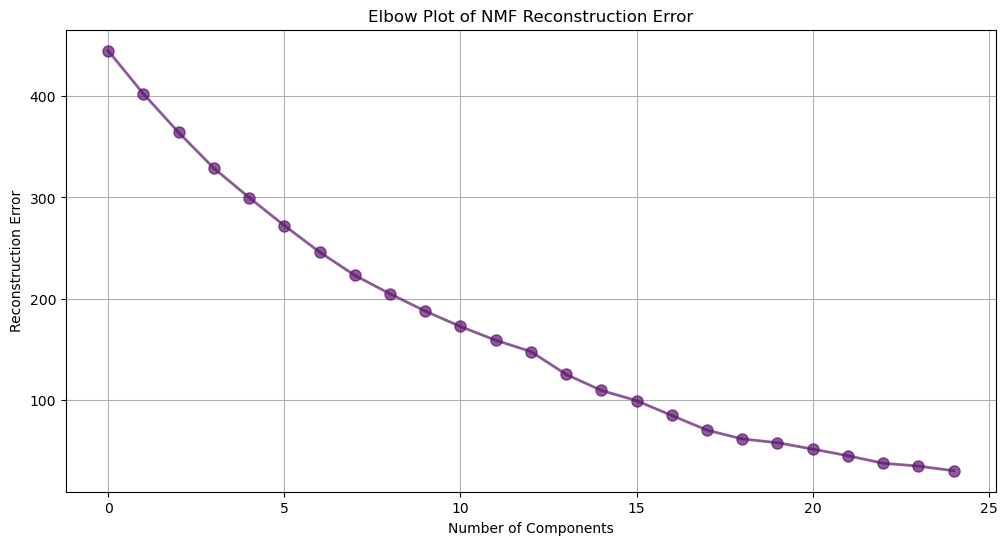

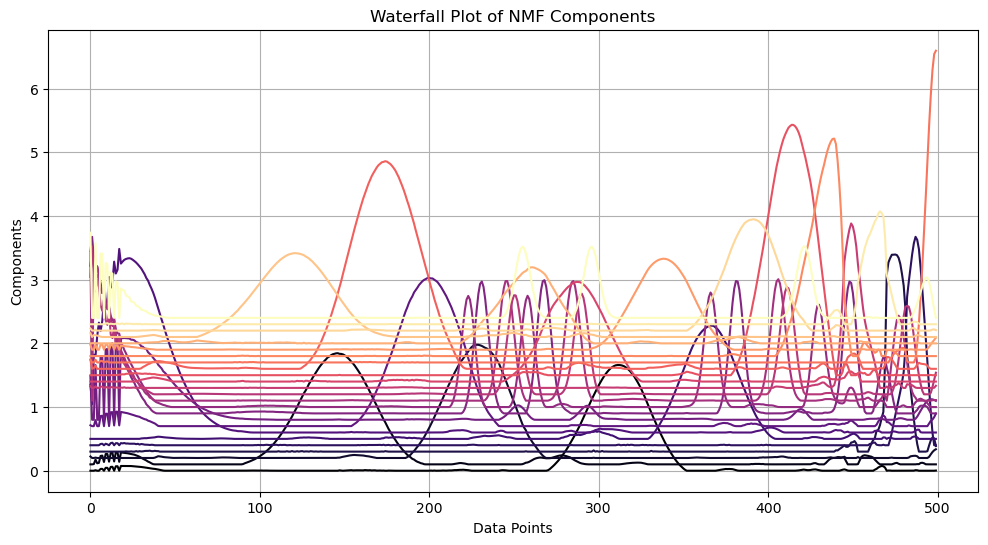

The best number of components is 25


In [46]:
best_W, best_H, best_reconstruction_err = run_sklearn_nmf(combined_data, max_components=25, max_iter=1000, init='nndsvd', solver='mu', tol=1e-4, patience=5, randomize_init=True)

In [47]:
def cluster_results(data, n_clusters):
    """
    Cluster the NMF results using agglomerative clustering and return the clusters.

    Parameters:
    - data: NMF results data matrix.
    - n_clusters: Number of clusters to create.

    Returns:
    - clusters: Cluster assignments for each data point.
    """
    from sklearn.cluster import AgglomerativeClustering

    cluster_data = np.array(data).T
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(cluster_data)
    
    #matching the clusters to the original data
    data_dict = {"Cluster_Number":[], "Component":[]}
    
    x=0
    while x < len(data[1]):
        data_dict["Cluster_Number"].append(clusters[x])
        data_dict["Component"].append(cluster_data[x])
        x = x+1
    
    q = 0
    while q < n_clusters:
        z = 0
        plt.figure(figsize=(5,5))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agglomerative Clustering'+' ' +str(q))

        while z < len(data[1]):
            if data_dict["Cluster_Number"][z] == q:
                plt.plot(data_dict["Component"][z], label = 'Component'+str(z))
            z = z+1
        q = q+1
    
    return data_dict

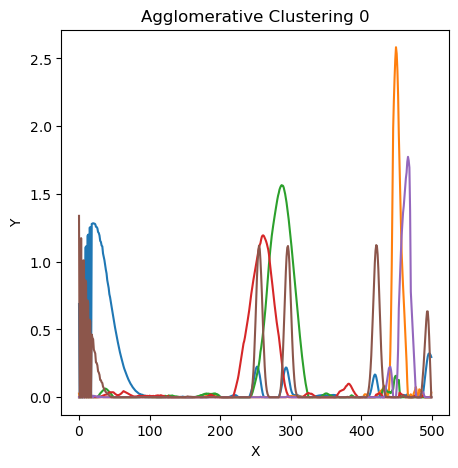

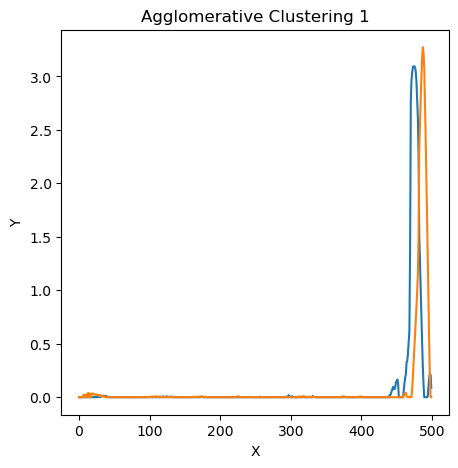

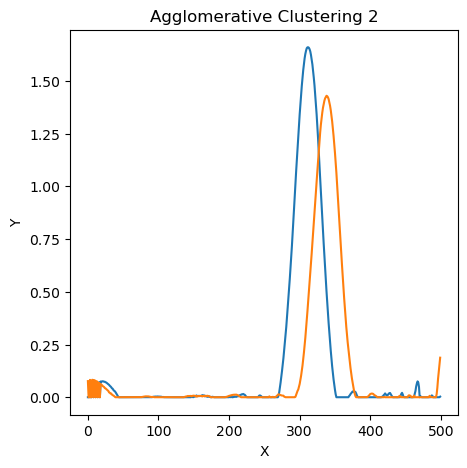

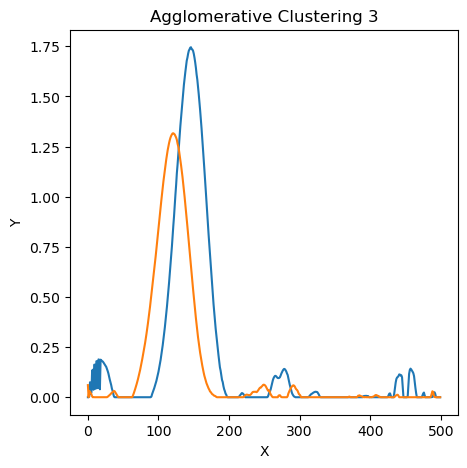

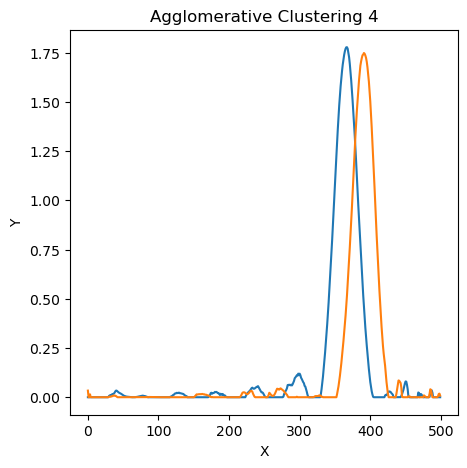

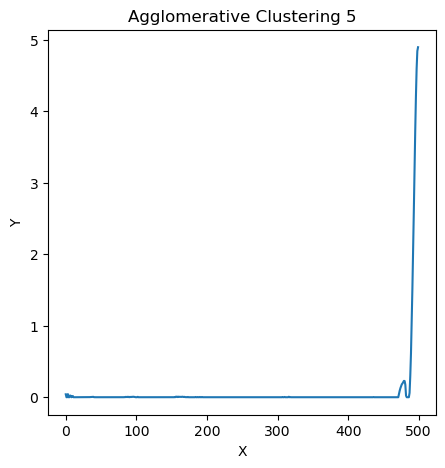

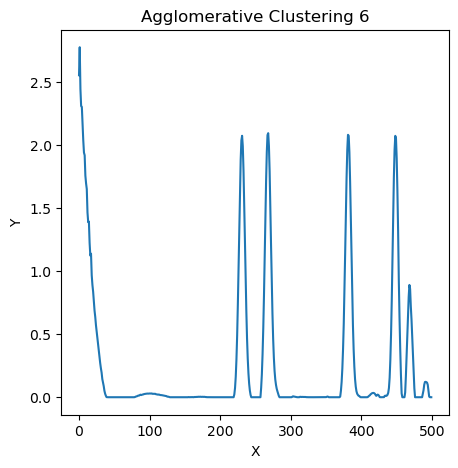

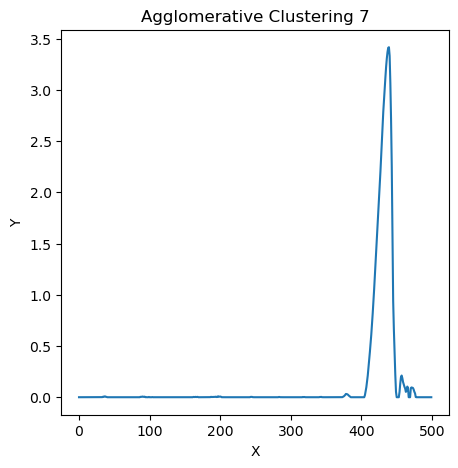

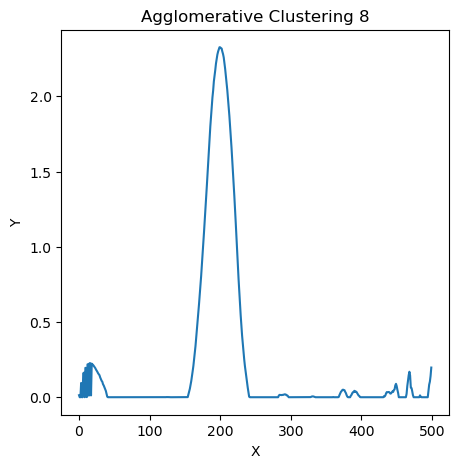

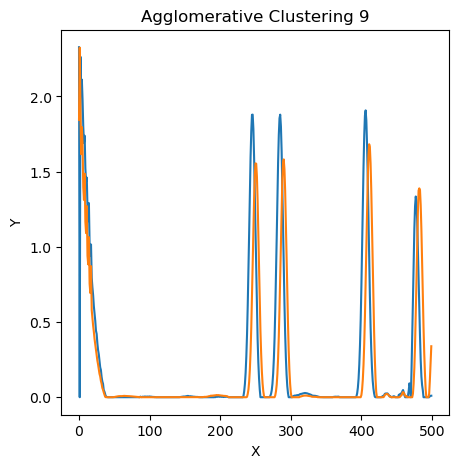

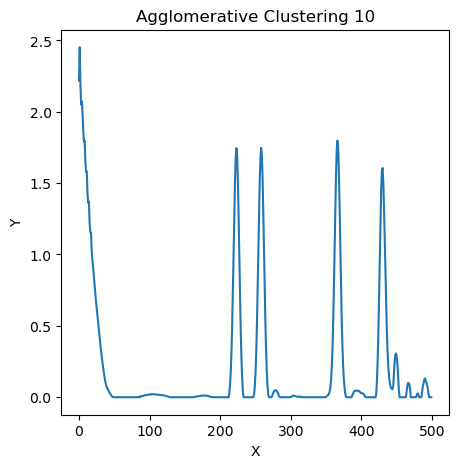

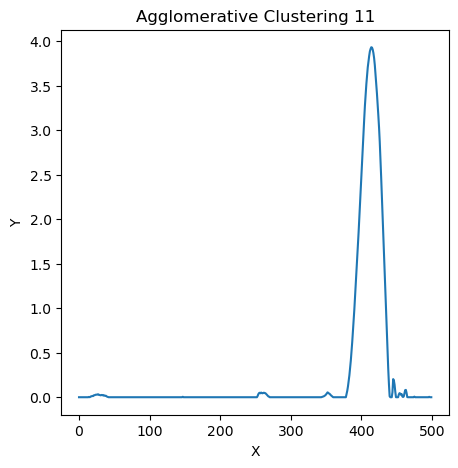

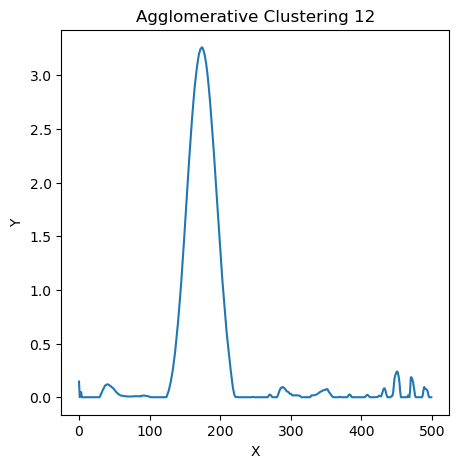

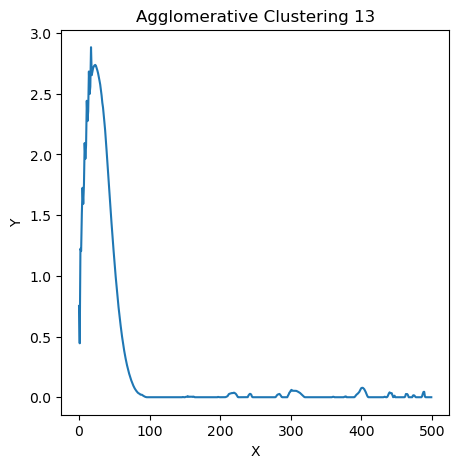

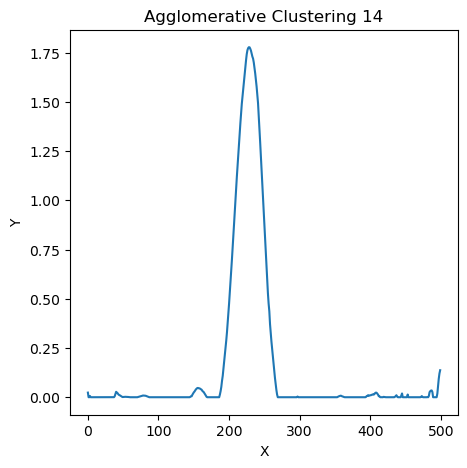

In [48]:
test = cluster_results(best_W, 15)

In [49]:
def cluster_results_basis(data, n_clusters):
    """
    Cluster the NMF results using agglomerative clustering and return the clusters.

    Parameters:
    - data: NMF results data matrix.
    - n_clusters: Number of clusters to create.

    Returns:
    - clusters: Cluster assignments for each data point.
    """
    from sklearn.cluster import AgglomerativeClustering

    cluster_data = np.array(data).T
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(cluster_data)
    
    #matching the clusters to the original data
    data_dict = {"Cluster_Number":[], "Component":[]}
    
    x=0
    while x < len(data[1]):
        data_dict["Cluster_Number"].append(clusters[x])
        data_dict["Component"].append(cluster_data[x])
        x = x+1
    
    q = 0
    while q < n_clusters:
        z = 0
        plt.figure(figsize=(5,5))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agglomerative Clustering'+' ' +str(q))

        while z < len(data[1]):
            if data_dict["Cluster_Number"][z] == q:
                plt.plot(data_dict["Component"][z], label = 'Component'+str(z))
            z = z+1
        q = q+1
    
    return data_dict

In [ ]:
def cluster_results_weights(H_matrix, W_matrix, n_clusters):
    """
    Cluster the NMF results using agglomerative clustering and return the clusters.

    Parameters:
    - data: NMF results data matrix.
    - n_clusters: Number of clusters to create.

    Returns:
    - clusters: Cluster assignments for each data point.
    """
    from sklearn.cluster import AgglomerativeClustering

    cluster_data = np.array(H_matrix)
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(cluster_data)
    
    #matching the clusters to the original data
    data_dict = {"Cluster_Number":[], "Component":[]}
    
    x=0
    while x < len(data[1]):
        data_dict["Cluster_Number"].append(clusters[x])
        data_dict["Component"].append(W_matrix[x])
        x = x+1
    
    q = 0
    while q < n_clusters:
        z = 0
        plt.figure(figsize=(5,5))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agglomerative Clustering'+' ' +str(q))

        while z < len(data[1]):
            if data_dict["Cluster_Number"][z] == q:
                plt.plot(data_dict["Component"][z], label = 'Component'+str(z))
            z = z+1
        q = q+1
    
    return data_dict

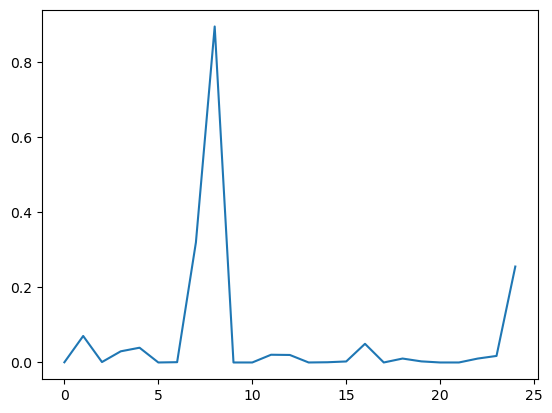

In [23]:
plt.plot(best_H[:,1])

In [50]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def cluster_results_weights(H_matrix, W_matrix, n_clusters):
    """
    Cluster the NMF results using agglomerative clustering and return the clusters.

    Parameters:
    - H_matrix: Coefficient matrix from NMF.
    - W_matrix: Basis matrix from NMF.
    - n_clusters: Number of clusters to create.

    Returns:
    - cluster_dict: Dictionary with cluster assignments and associated components.
    """
    # Perform agglomerative clustering on the H matrix
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(H_matrix)
    
    # Create a dictionary to store cluster assignments and associated components
    cluster_dict = {i: [] for i in range(n_clusters)}
    
    for i, cluster in enumerate(clusters):
        cluster_dict[cluster].append(W_matrix[:, i])
    
    # Plot the clusters
    for cluster, components in cluster_dict.items():
        plt.figure(figsize=(6, 6))
        colors = plt.cm.plasma(np.linspace(0, 1, len(components)))
        
        for i, component in enumerate(components):
            plt.plot(component + i * 0.1, label='Component {}'.format(i + 1), color=colors[i])
        
        plt.title('Cluster {} Components'.format(cluster))
        plt.xlabel('Data Points')
        plt.ylabel('Components')
        plt.grid(True)
        plt.show()
    
    return cluster_dict

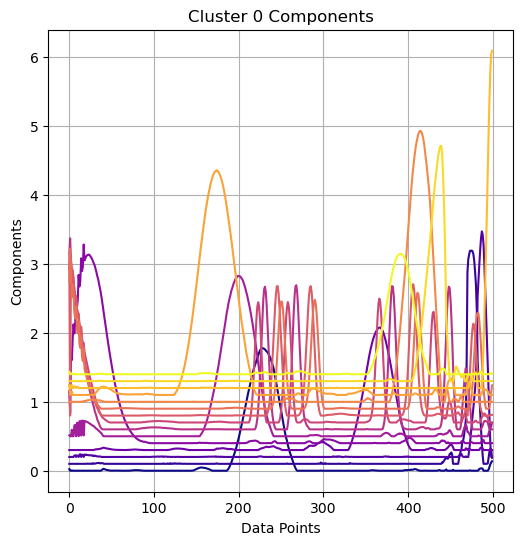

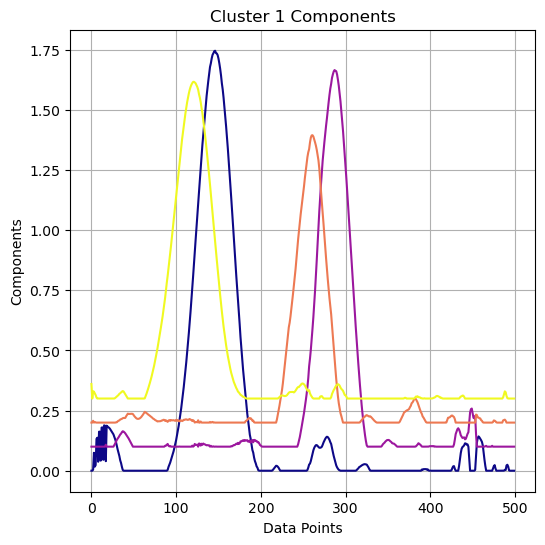

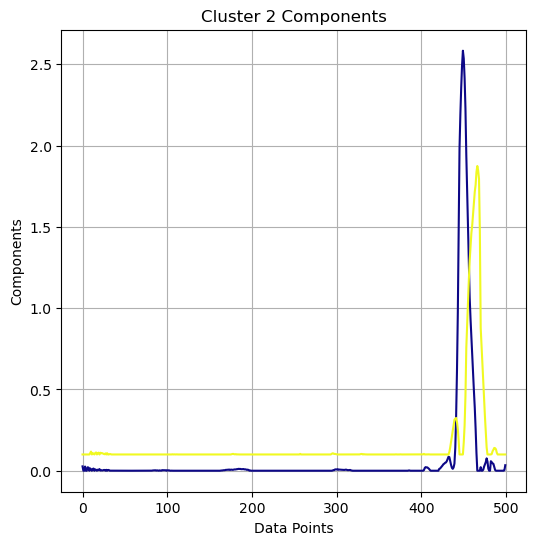

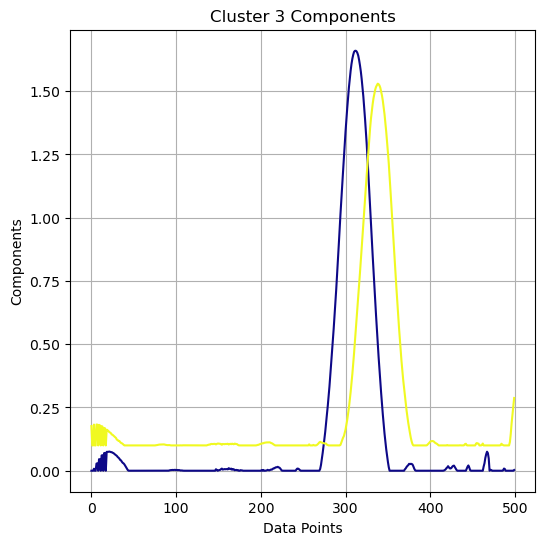

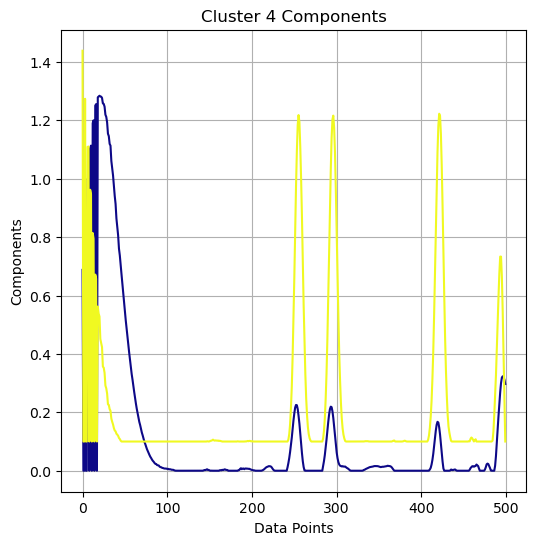

In [51]:
test_2 = cluster_results_weights(best_H, best_W, 5)

In [52]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def cluster_results_basis(W_matrix, n_clusters):
    """
    Cluster the NMF results using agglomerative clustering on the basis matrix and return the clusters.

    Parameters:
    - W_matrix: Basis matrix from NMF.
    - n_clusters: Number of clusters to create.

    Returns:
    - cluster_dict: Dictionary with cluster assignments and associated components.
    """
    # Perform agglomerative clustering on the W matrix
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(W_matrix.T)
    
    # Create a dictionary to store cluster assignments and associated components
    cluster_dict = {i: [] for i in range(n_clusters)}
    
    for i, cluster in enumerate(clusters):
        cluster_dict[cluster].append(W_matrix[:, i])
    
    # Plot the clusters
    for cluster, components in cluster_dict.items():
        plt.figure(figsize=(6, 6))
        colors = plt.cm.plasma(np.linspace(0, 1, len(components)))
        
        for i, component in enumerate(components):
            plt.plot(component + i * 0.1, label='Component {}'.format(i + 1), color=colors[i])
        
        plt.title('Cluster {} Components'.format(cluster))
        plt.xlabel('Data Points')
        plt.ylabel('Components')
        plt.grid(True)
        plt.show()
    
    return cluster_dict

# Example usage:
# W_matrix = np.random.rand(100, 5)  # Replace this with your actual W matrix
# n_clusters = 3
# clusters = cluster_results_weights(W_matrix, n_clusters)

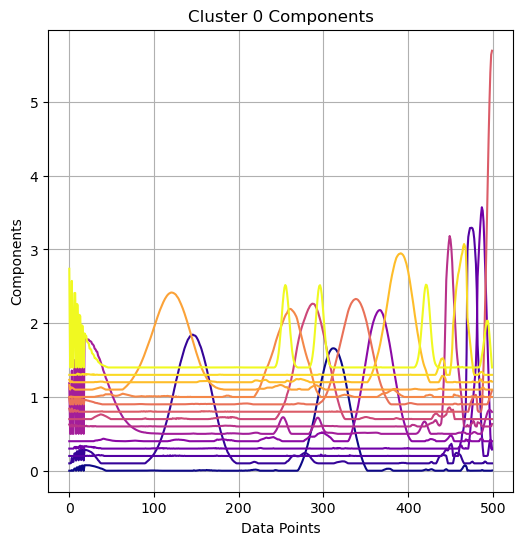

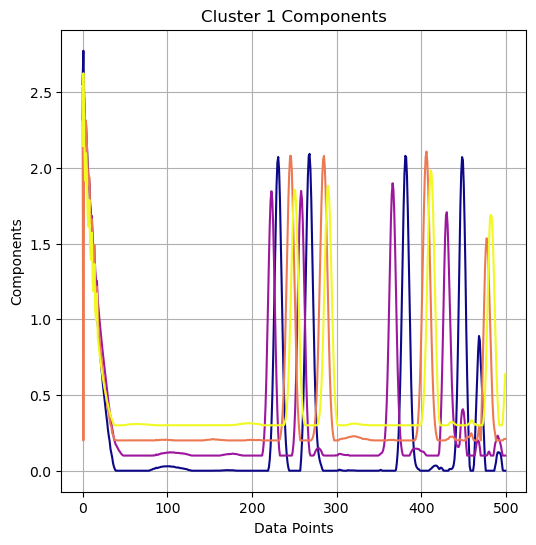

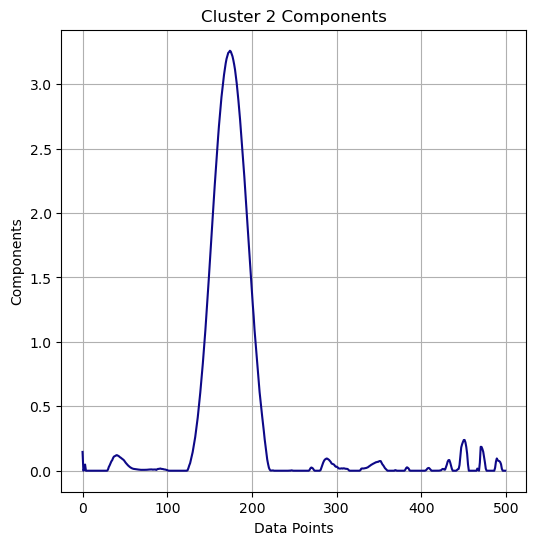

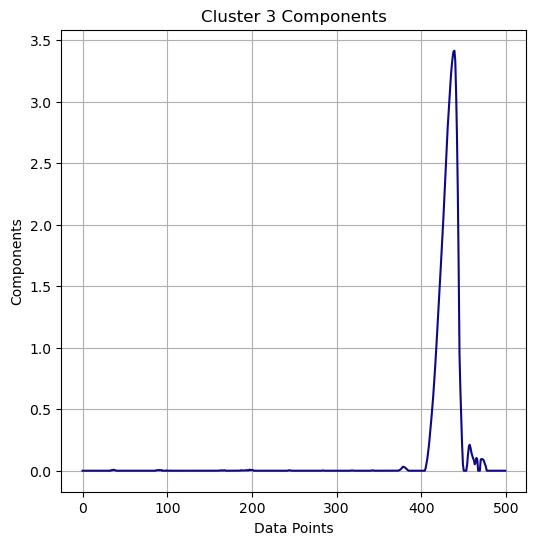

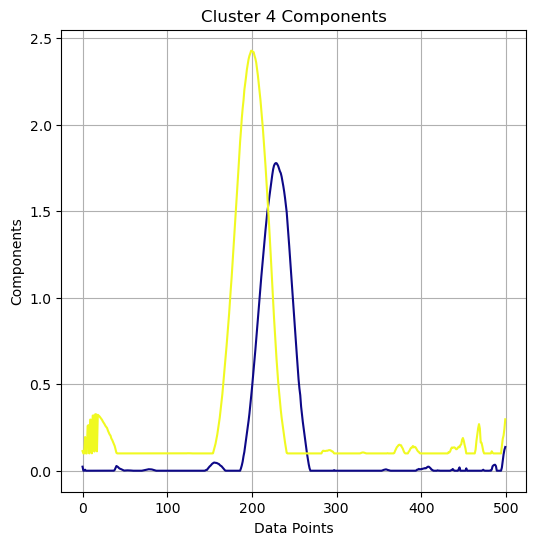

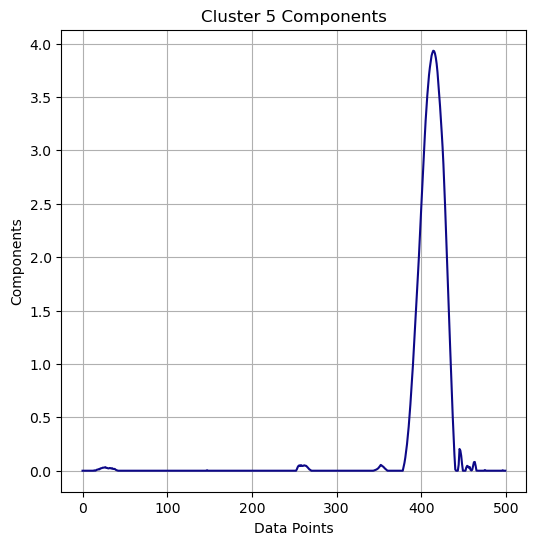

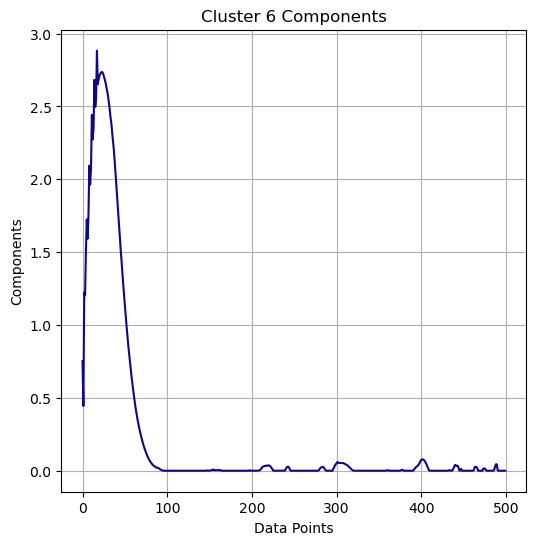

In [53]:
test_3 = cluster_results_basis(best_W, 7)